# Object Detection

In section of code, we are identify the object through the image user going to send or upload. We will also count the items.

### Installing and importing libraries needed
1. Using yolov11 for Object Detection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.2/876.2 kB 19.8 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/112.6 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import Image

In [4]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


Downloading Dataset ->
1. Supply chains shelf object
3. https://universe.roboflow.com/brad-dwyer/synthetic-fruit-old/


In [51]:
from roboflow import Roboflow
rf = Roboflow(api_key="nYlhQcXOt3mvr7zv2byS")
project = rf.workspace("supplychainshelfobjects-uxuzo").project("shelf-objects-annotated-owais")
version = project.version(5)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [67]:
from roboflow import Roboflow
rf = Roboflow(api_key="nYlhQcXOt3mvr7zv2byS")
project = rf.workspace("brad-dwyer").project("synthetic-fruit-old")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


Checking dataset location

In [47]:
dataset.location

'/content/Synthetic-Fruit-Old-3'

Training on custom Dataset

!yolo task=detect mode=train data={dataset.location}/data.yaml model=/content/runs/detect/train/weights/best.pt epochs=5 imgsz=640

In [68]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=5 imgsz=640

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/Synthetic-Fruit-Old-3/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

Checking results like confusion matrix, f1-scores

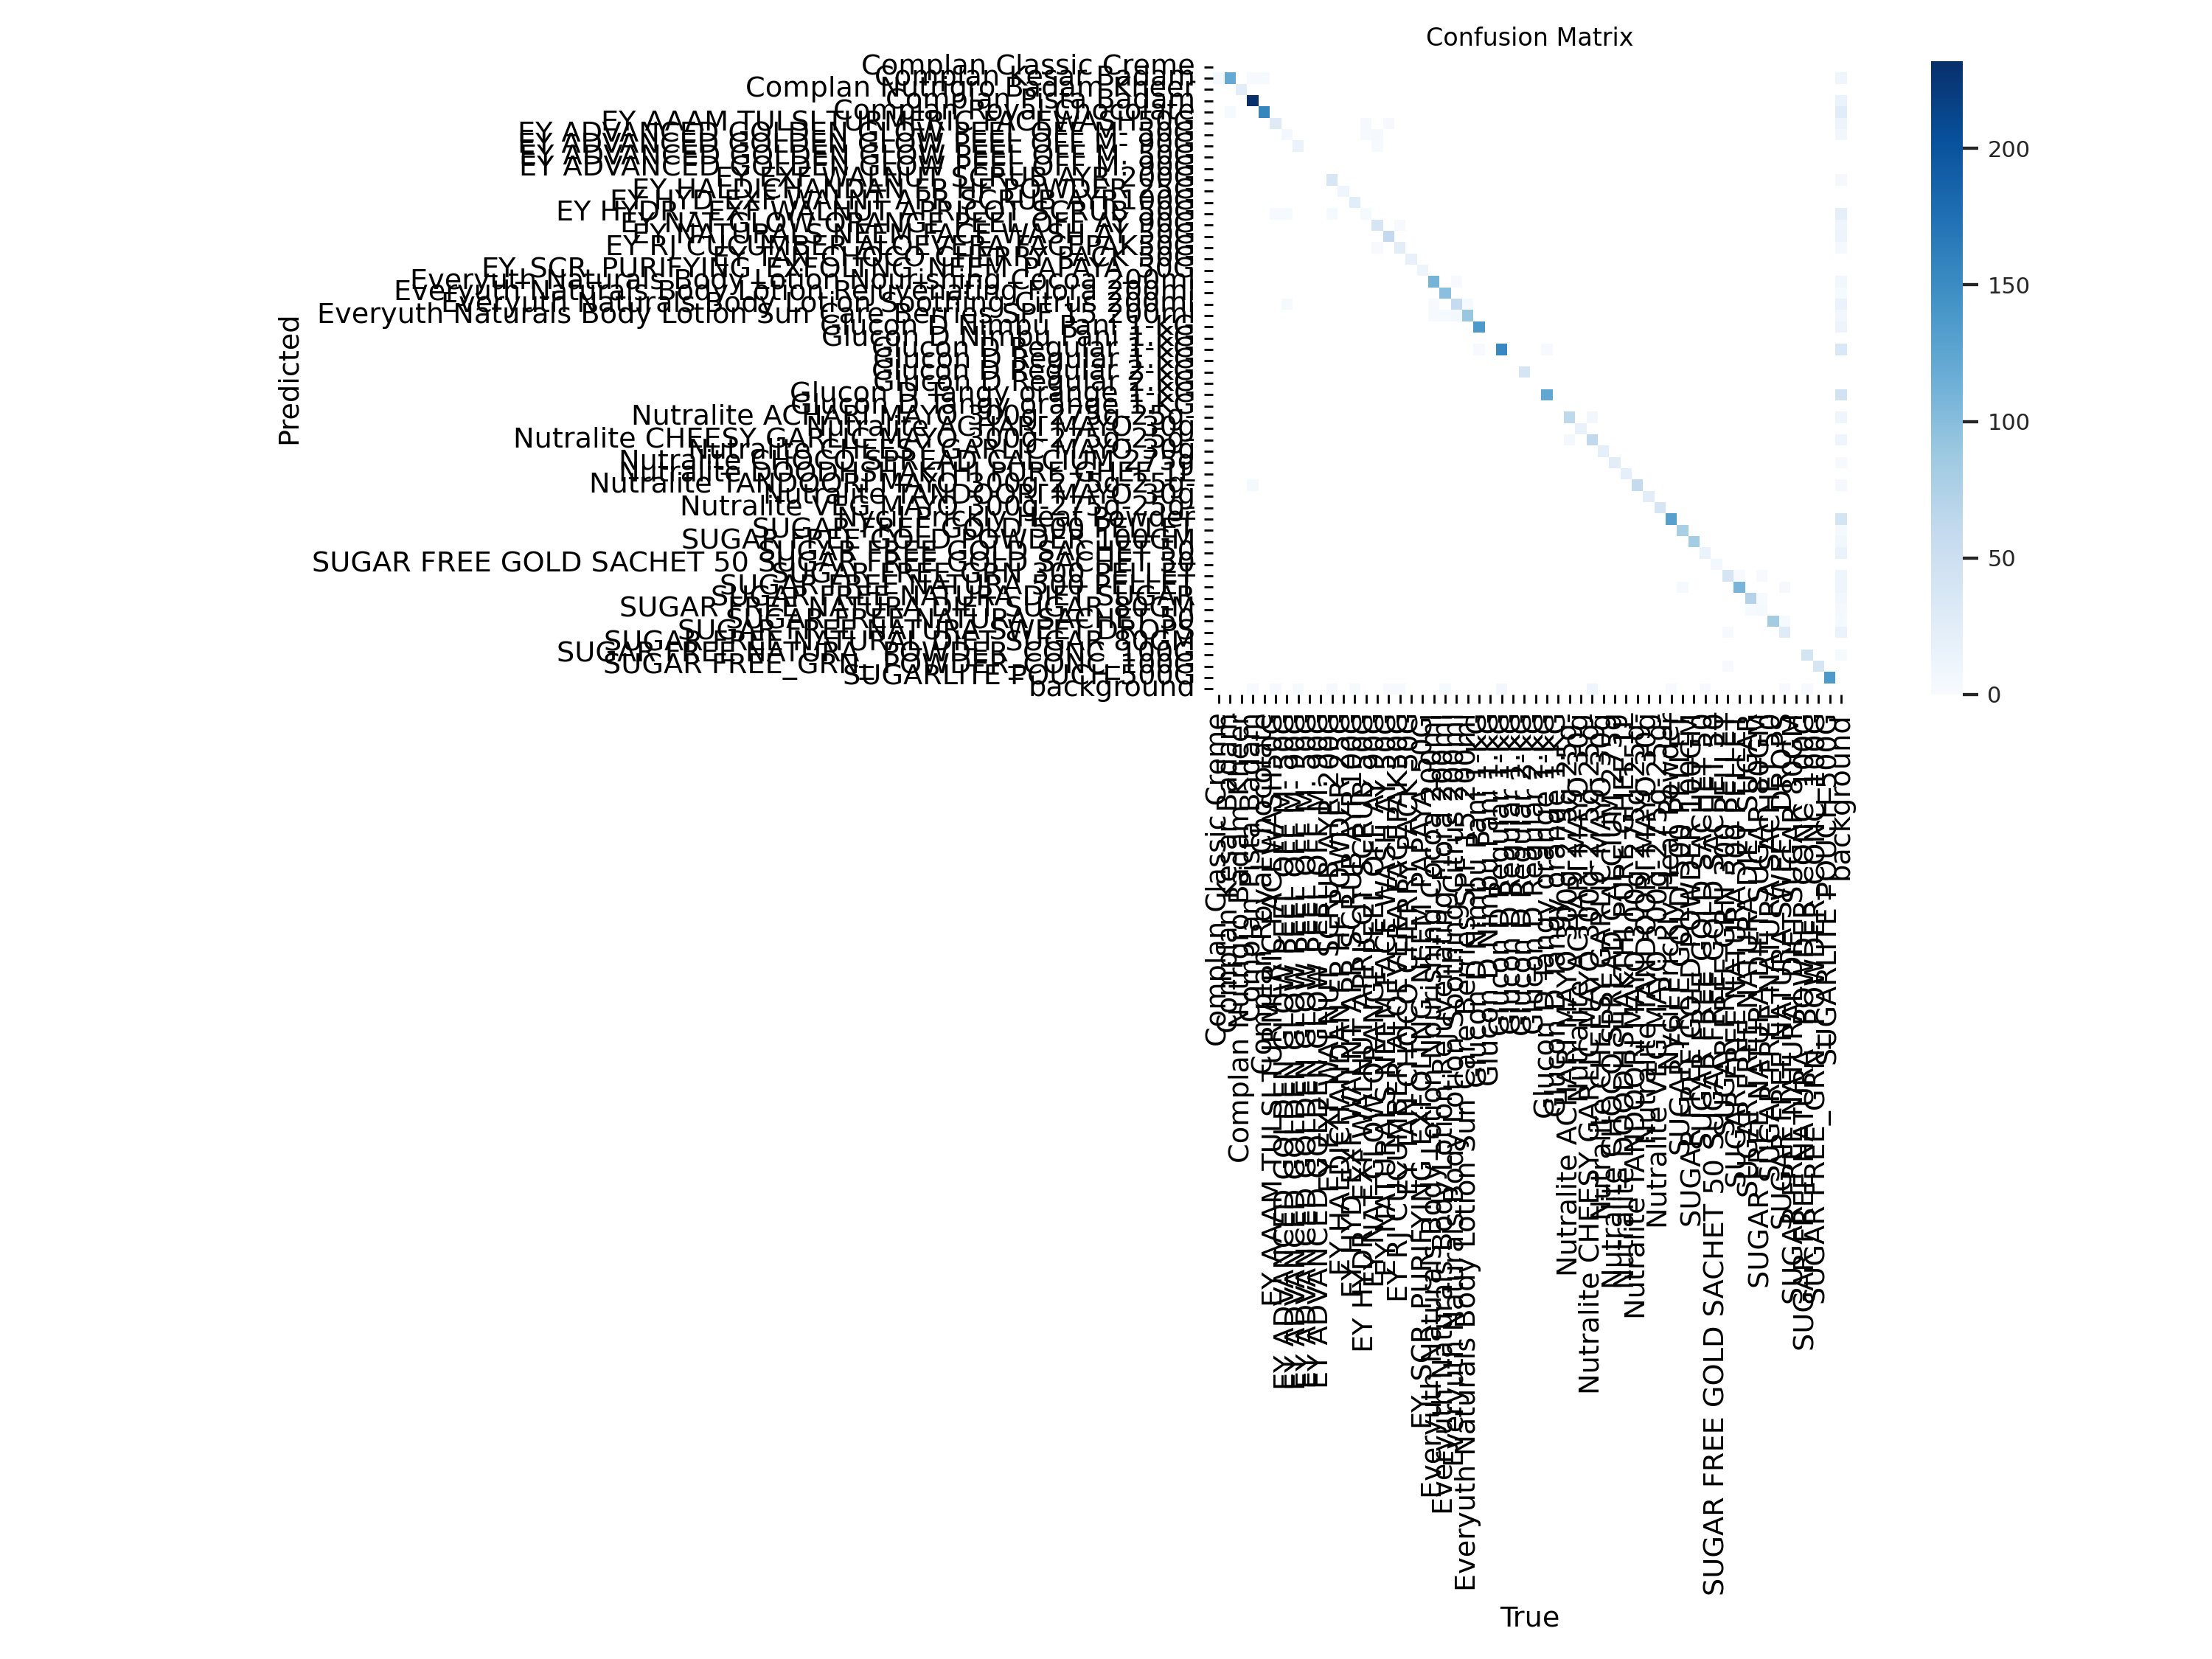

In [19]:
Image("/content/runs/detect/train/confusion_matrix.png")

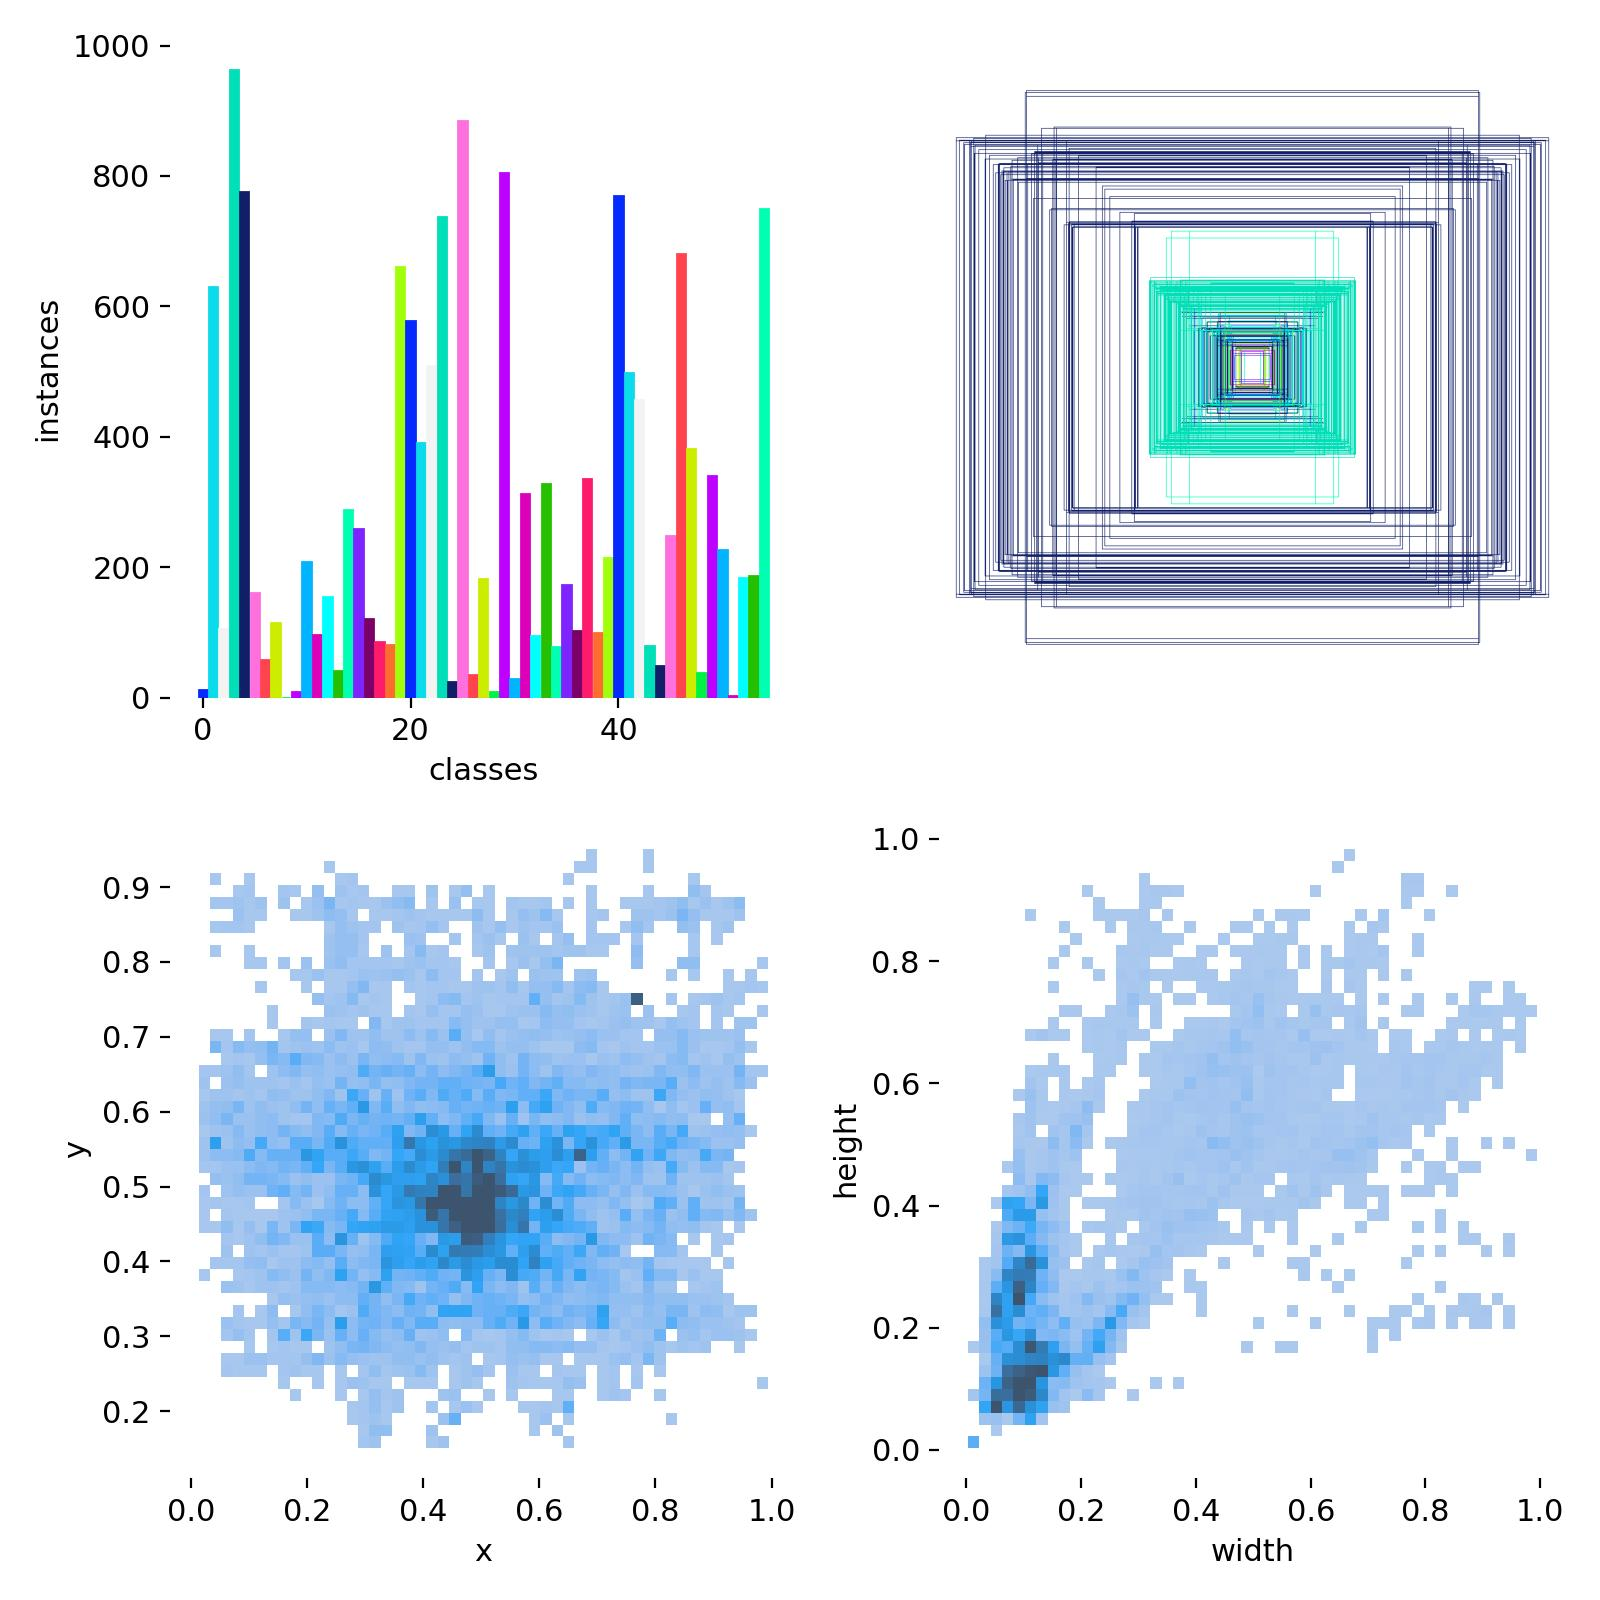

In [ ]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

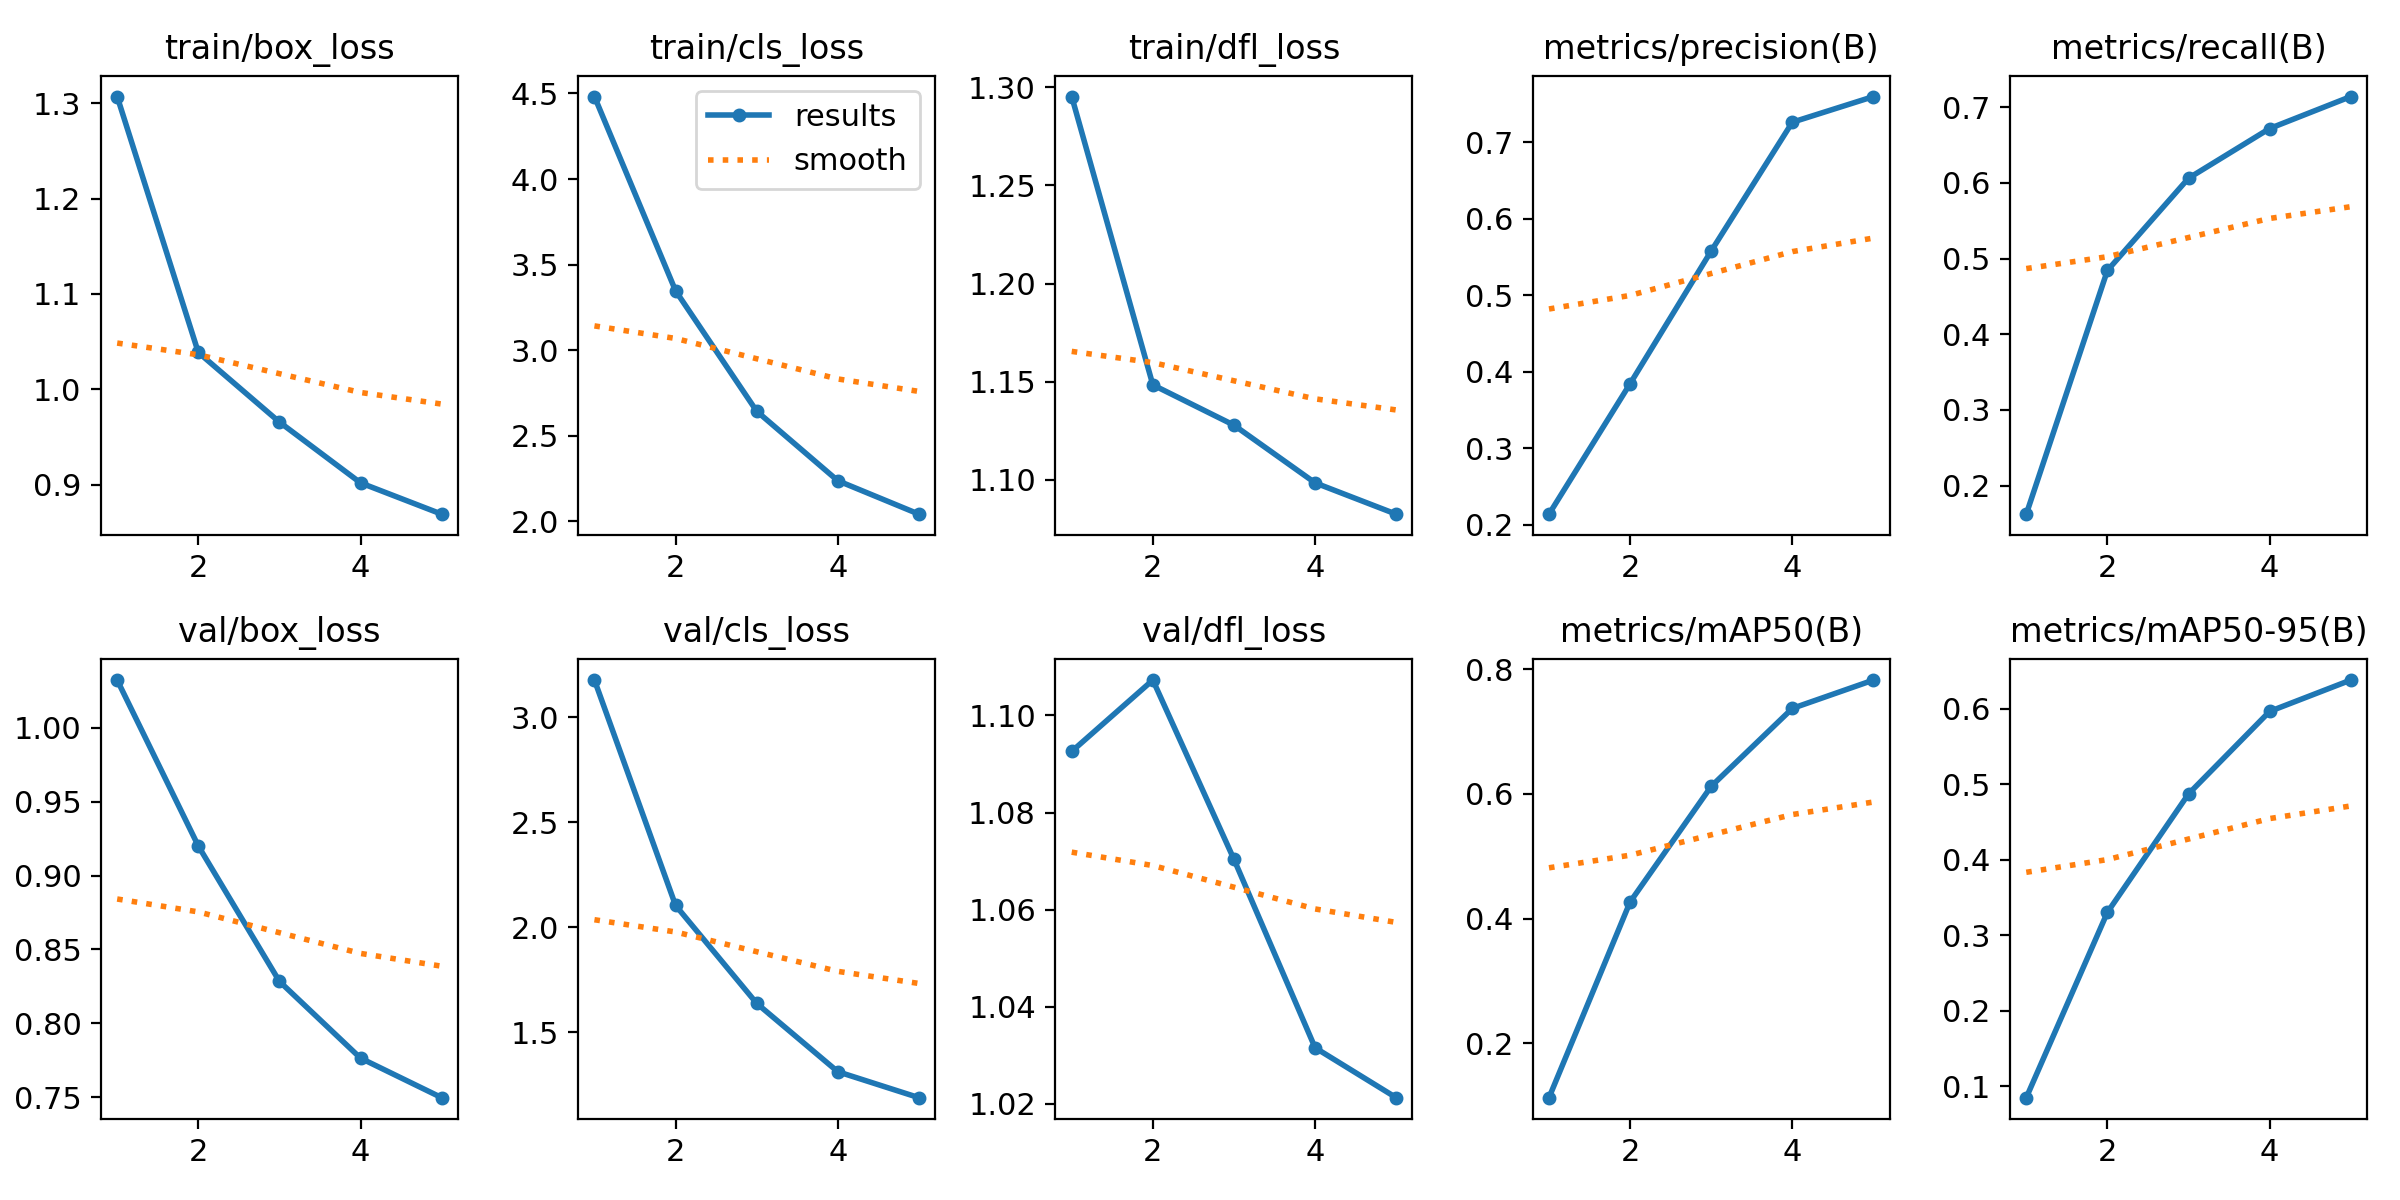

In [69]:
Image("/content/runs/detect/train13/results.png", width=600)

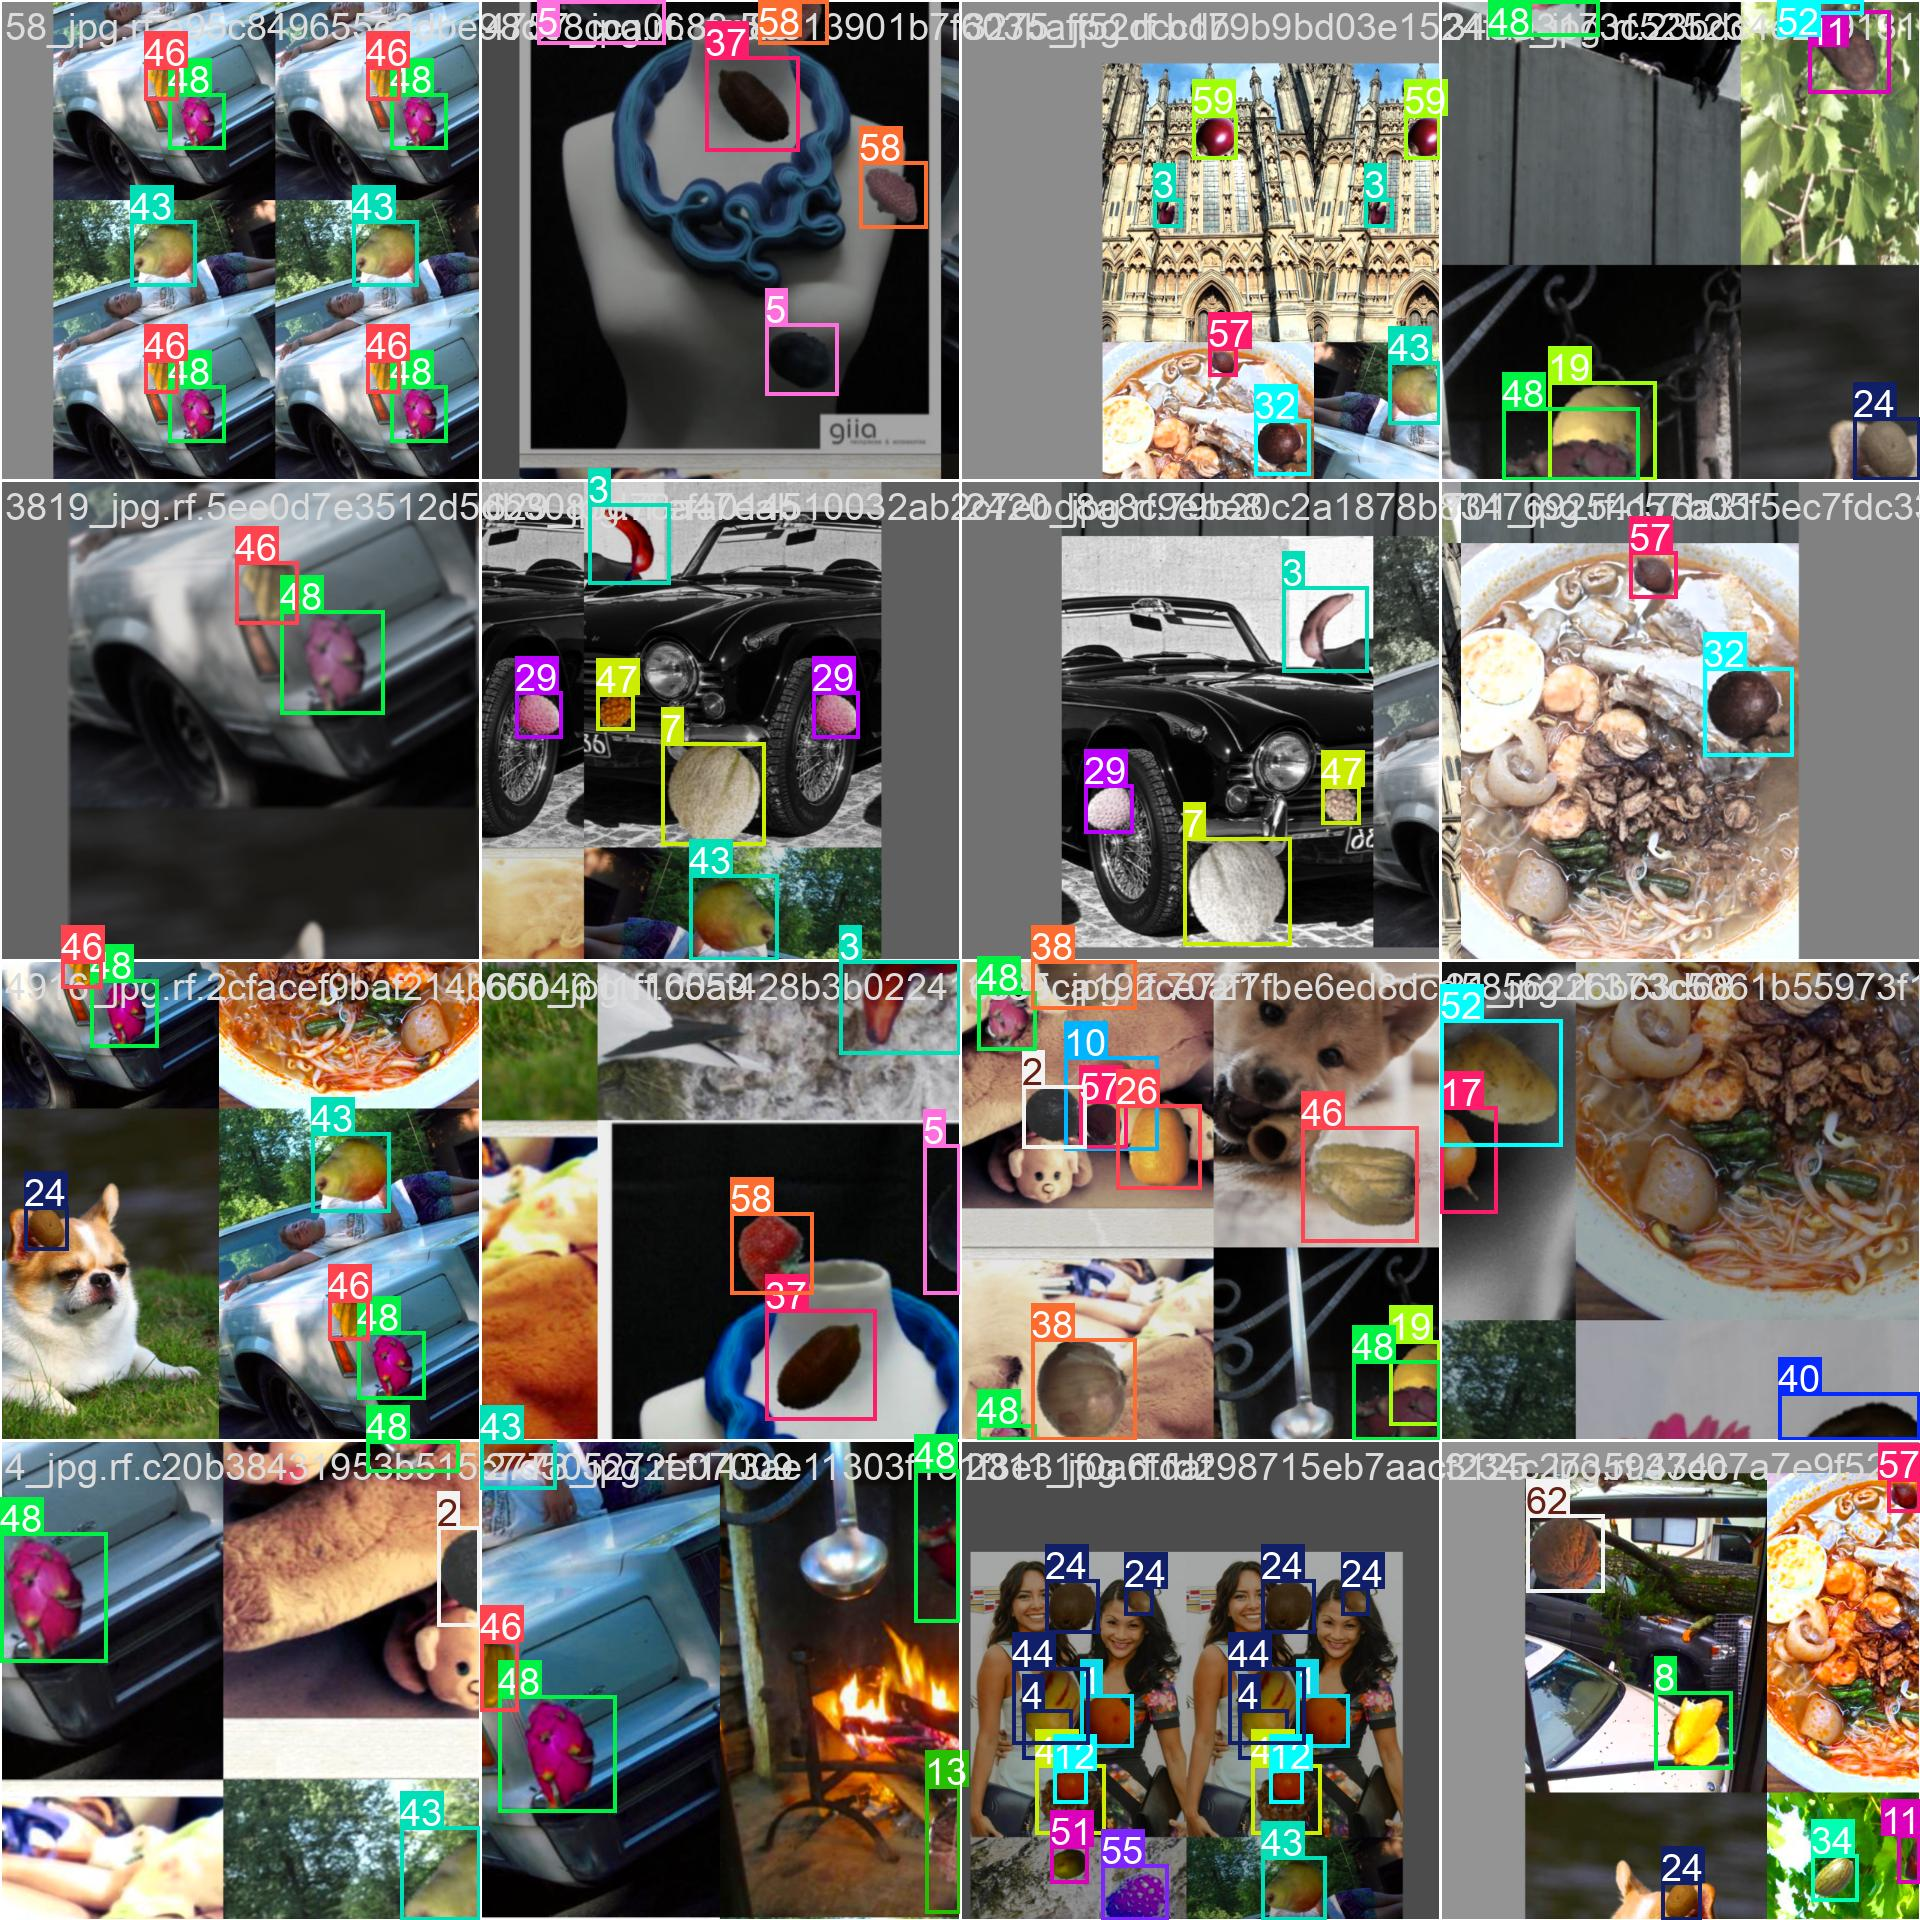

In [70]:
Image("/content/runs/detect/train13/train_batch0.jpg")

Validate fine-tuned Model

In [71]:
!yolo task=detect mode=val model=/content/runs/detect/train13/weights/best.pt data={dataset.location}/data.yaml > output.txt

val: Scanning /content/Synthetic-Fruit-Old-3/valid/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100% 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:11<00:00,  5.54it/s]


In [72]:
import pandas as pd
import re

# Function to parse the output
def parse_yolo_output(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        # Use regex to match the relevant data lines
        match = re.match(r'(.+?)\s+(\d+)\s+(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)', line)
        if match:
            data.append(match.groups())

    # Create a DataFrame from the parsed data
    df = pd.DataFrame(data, columns=['Class', 'TP', 'FP', 'Precision', 'Recall', 'F1-Score', 'mAP@0.5'])
    df['TP'] = pd.to_numeric(df['TP'])
    df['FP'] = pd.to_numeric(df['FP'])
    df['Precision'] = pd.to_numeric(df['Precision'])
    df['Recall'] = pd.to_numeric(df['Recall'])
    df['F1-Score'] = pd.to_numeric(df['F1-Score'])
    df['mAP@0.5'] = pd.to_numeric(df['mAP@0.5'])

    return df

# Parse the YOLO output file
output_df = parse_yolo_output('output.txt')

# Display the DataFrame as a table
output_df.sort_values(by='Class', inplace=True)
output_df.reset_index(drop=True, inplace=True)
import numpy as np

# Display the formatted DataFrame
import IPython
IPython.display.display(output_df)


,Class,TP,FP,Precision,Recall,F1-Score,mAP@0.5
0,Nut,43,44,0.671,0.591,0.629,0.533
1,all,1000,2738,0.761,0.714,0.783,0.639
2,Kaki,36,37,0.783,0.838,0.872,0.733
3,Kiwi,44,44,0.698,0.841,0.839,0.728
4,Pear,43,43,0.654,0.484,0.653,0.459
...,...,...,...,...,...,...,...
59,Redcurrant,34,35,0.761,0.914,0.935,0.742
60,Strawberry,42,43,0.812,0.503,0.706,0.511
61,Cauliflower,32,32,0.641,0.951,0.897,0.717
62,Huckleberry,44,45,0.870,0.911,0.922,0.800


Inference on custom Model

In [73]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,592,877 parameters, 0 gradients, 6.4 GFLOPs

image 1/2 /content/Screenshot 2024-10-18 204939.png: 640x416 1 Glucon D Nimbu Pani 1-KG, 45.8ms
image 2/2 /content/gettyimages-6410-001189-612x612.jpg: 640x640 (no detections), 9.7ms
Speed: 3.7ms preprocess, 27.8ms inference, 271.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [74]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict3*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

Custom Image Testing
0. Download the photo
(can use ` !gdown "url" `
1. ` !yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images `

change the source here.
`source = 0` to access local camera

In the above part, I have classified and find the quantity of the object. Now, in the next part if the item is fruit or vegetable we will find the freshness of it.